**Imports**

In [1]:
import sympy as sym

import numpy as np

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

import matplotlib.colors as colors

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
plt.rcParams["font.weight"] = "normal"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 11

plt.rcParams["font.family"] = "Arial"

In [4]:
import matplotlib.ticker as ticker

In [5]:
import glob

In [6]:
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    a = str(a).split(".")[0]
    return r'${} \times 10^{{{}}}$'.format(a, b)

### Stochastic stability of cooperation for expected payoffs

In [7]:
N, delta, b, c, q = sym.symbols("N, \delta, b, c, q")

In [8]:
sd_expr = ((1 - delta + delta * q) * (b - (b - c) / (N - 1)) - ((N - 2) / (N - 1)) * (b - c / 2))
sd_expr

-(N - 2)*(b - c/2)/(N - 1) + (b - (b - c)/(N - 1))*(\delta*q - \delta + 1)

In [9]:
sol = sym.solve(sd_expr, q)[0]

In [10]:
written = 1 - (1 / delta) * ((N * c / 2) / ((N - 2) * b + c))

In [11]:
written

-N*c/(2*\delta*(b*(N - 2) + c)) + 1

In [12]:
(sol - written).expand().factor()

0

At the limit of $N \rightarrow \infty$.

In [13]:
sym.limit(written - 1, N, sym.oo)

-c/(2*\delta*b)

### Plotting Simulation Results

In [14]:
reds, blues = matplotlib.colormaps.get_cmap("Reds"), matplotlib.colormaps.get_cmap("Blues")

cmaps = [blues, reds]

In [15]:
expected_dfs = [pd.read_csv(f"../to_archieve/clean_snowdrift_low_benefit.csv"),
                pd.read_csv(f"../to_archieve/clean_snowdrift_high_benefit.csv")]

In [16]:
last_round_dfs = [pd.read_csv(f"../to_archieve/clean_snowdrift_low_benefit_limited.csv"),
                  pd.read_csv(f"../to_archieve/clean_snowdrift_high_benefit_limited.csv")]

In [17]:
heatmaps, extents = [], []

for exp, stoch in zip(expected_dfs, last_round_dfs):
    
    for df in [exp, stoch]:
        
        ps, qs = [], []
        for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
            for _ in range(int(v)):
                ps.append(p)
                qs.append(q)


        heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)
    
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        
        heatmaps.append(heatmap)
        extents.append(extent)

In [18]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

In [19]:
max_

670092.0

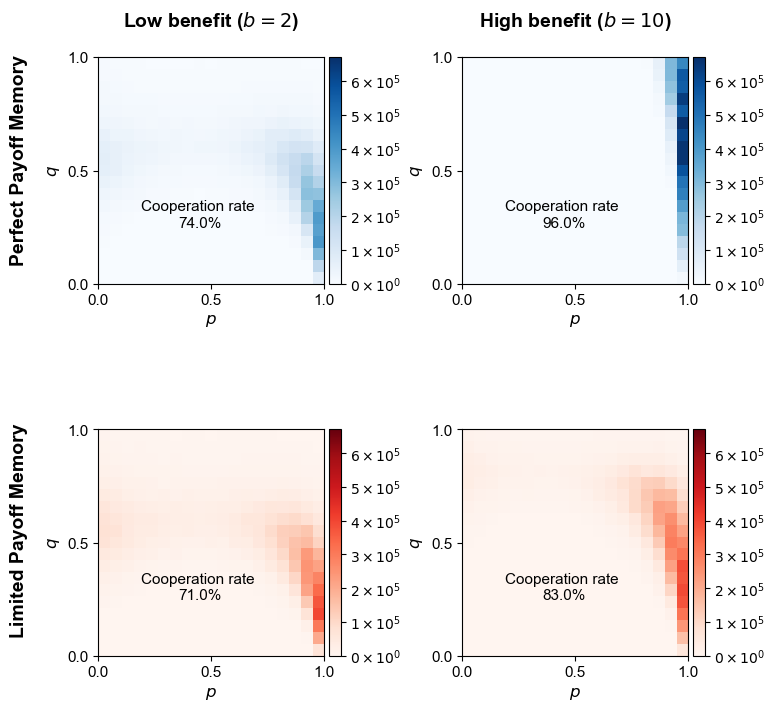

In [20]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 7.5))


cooperation_rates = [round(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)), 2) 
                     for df in expected_dfs]

cooperation_rates += [round(sum(df['average cooperation rate'] * (df['frequencies'] / (10 ** 7))), 2) 
                     for df in last_round_dfs]

for i, heatmap in enumerate([heatmaps[0], heatmaps[2], heatmaps[1], heatmaps[3]]):
    
    index = int(i / 2), (i % 2)


    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[int(i / 2)],
                            vmax=max_
                            )

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cb = fig.colorbar(im, cax=cax, orientation='vertical',
                 format=ticker.FuncFormatter(fmt))
    
    for t in cb.ax.get_yticklabels():
        t.set_fontsize(10)

    axes[index].set_xticks(np.linspace(0, 1, 3))
    axes[index].set_yticks(np.linspace(0, 1, 3));
    axes[index].set_xlabel("$p$", fontweight='normal', fontsize=12)
    axes[index].set_ylabel("$q$", fontweight='normal', fontsize=12)
    
    axes[index].text(0.45, 0.25, "Cooperation rate \n" + str(cooperation_rates[i] * 100) + '%',
                 horizontalalignment='center')

axes[0, 0].set_title("Low benefit ($b = 2$)", fontweight='bold', fontsize=14, y=1.1);
axes[0, 1].set_title("High benefit ($b = 10$)", fontweight='bold', fontsize=14, y=1.1);

axes[0, 0].text(-0.35, 0.1, "Perfect Payoff Memory",
                horizontalalignment='center',  fontweight='bold', fontsize=14, rotation=90)

axes[1, 0].text(-0.35, 0.1, "Limited Payoff Memory",
                horizontalalignment='center',  fontweight='bold', fontsize=14, rotation=90)

fig.tight_layout();

plt.subplots_adjust(wspace=.5, hspace=.5)

fig.savefig("../paper/static/snowdrift_game_results.pdf", bbox_inches='tight')

In [21]:
expected_dfs[0].sort_values("frequencies")[-70:-60]

,y,p,q,average cooperation rate,average score,t,frequencies
21177,0.983635,0.972708,0.235309,0.896403,1.483877,2520329,2834
68427,0.182914,0.993508,0.122803,0.943895,1.491695,8206140,2840
2642,0.135929,0.997940,0.171307,0.983226,1.496181,308004,2847
10692,0.897613,0.984577,0.138953,0.900079,1.485024,1277060,2857
37508,0.550202,0.971908,0.338458,0.922344,1.490607,4462845,2858
47139,0.391862,0.994987,0.115312,0.953667,1.494692,5636511,2874
5514,0.897690,0.965286,0.310420,0.899415,1.484824,672301,2886
54015,0.684552,0.917852,0.439546,0.842233,1.462616,6489861,2897
49735,0.976363,0.988521,0.092657,0.890595,1.481990,5946852,2918
52539,0.543960,0.985075,0.323046,0.954622,1.496461,6290346,2954


In [22]:
base = 66780

expected_dfs[0][base - 5: base + 1]

,y,p,q,average cooperation rate,average score,t,frequencies
66775,0.360000,0.006606,0.742204,0.427597,1.008517,8013429,59
66776,0.387076,0.195315,0.531638,0.397829,0.956084,8013488,73
66777,0.912783,0.155524,0.313668,0.271391,0.703061,8013561,99
66778,0.805351,0.407099,0.640432,0.519502,1.153552,8013660,5
66779,0.516238,0.826322,0.422235,0.708229,1.372238,8013665,18
66780,0.466332,0.790200,0.560205,0.727196,1.388259,8013683,2794


In [23]:
indexes = np.arange(0, 70000, 500)

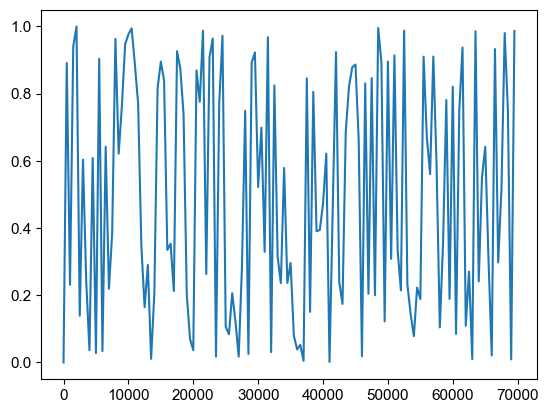

In [24]:
plt.plot(expected_dfs[0]['p'][indexes])

### Understanding the results

In [25]:
plt.set_cmap('bwr');

<Figure size 640x480 with 0 Axes>

In [26]:
most_freq = expected_dfs[0].sort_values("frequencies").iloc[-1]

In [27]:
import repeated_play

In [28]:
n = 11

b = 2

c = 1

ps = np.linspace(0, 1, n)
qs = np.linspace(0, 1, n)

In [29]:
def calc_payoffs(player, coplayer, b, c):
        
        M = repeated_play.transition_matrix_repeated_game(player,
                                                          coplayer,
                                                          memory='one')
        
        ss = repeated_play.stationary_distribution(M)[0]
        
        return ss @ np.array([b - c/2, b - c, b, 0])

In [30]:
def expected_payoffs(N, k, resident_payoffs, mutant_payoffs):
    resident = ((N - k - 1) * resident_payoffs[0] / (N - 1) +
                k * resident_payoffs[1] / (N - 1))
    
    mutant = ((N - k) * mutant_payoffs[0] / (N - 1) + 
              (k - 1) * mutant_payoffs[1] / (N - 1))
    
    return resident - mutant

In [31]:
self_payoffs_matrix = np.zeros((n, n))

for i, p in enumerate(ps):
    for j, q in enumerate(qs):
        
        payoff = calc_payoffs([p, q, p, q], [p, q, p, q], b, c)
        
        self_payoffs_matrix[i, j] = payoff

In [32]:
# ALLD is the mutant

alld_payoffs_matrix = np.zeros((n, n))

for i, p in enumerate(ps):
    for j, q in enumerate(qs):
        
        resident_payoffs = [self_payoffs_matrix[i, j], 
                            calc_payoffs([p, q, p, q], [0, 0, 0, 0], b, c)]
        
        mutant_payoffs = [calc_payoffs([0, 0, 0, 0], [p, q, p, q], b, c),
                          calc_payoffs([0, 0, 0, 0], [0, 0, 0, 0], b, c)]
        
        
        
        alld_payoffs_matrix[i, j] = expected_payoffs(100, 1,
                                                     resident_payoffs,
                                                     mutant_payoffs)

In [33]:
# ALLD is the resident

alld_res_payoffs_matrix = np.zeros((n, n))

for i, p in enumerate(ps):
    for j, q in enumerate(qs):
        
        mutant_payoffs = [calc_payoffs([p, q, p, q], [0, 0, 0, 0], b, c),
                            self_payoffs_matrix[i, j]]
        
        resident_payoffs = [calc_payoffs([0, 0, 0, 0], [0, 0, 0, 0], b, c),
                            calc_payoffs([0, 0, 0, 0], [p, q, p, q], b, c),]
        
        
        
        alld_res_payoffs_matrix[i, j] = expected_payoffs(100, 1,
                                                     resident_payoffs,
                                                     mutant_payoffs)

In [34]:
# Most Freq is the resident

most_freq_player = [most_freq['p'], most_freq['q'], most_freq['p'], most_freq['q']]

most_freq_payoffs_matrix = np.zeros((n, n))

for i, p in enumerate(ps):
    for j, q in enumerate(qs):
        
        resident_payoffs = [calc_payoffs(most_freq_player, most_freq_player, b, c),
                            calc_payoffs(most_freq_player, [p, q, p, q], b, c)]
        
        mutant_payoffs = [calc_payoffs([p, q, p, q], most_freq_player, b, c),
                          self_payoffs_matrix[i, j]]
        
        
        
        most_freq_payoffs_matrix[i, j] = expected_payoffs(100, 1,
                                                     resident_payoffs,
                                                     mutant_payoffs)

In [35]:
df = expected_dfs[0]

df[df['p'] < 0.9].sort_values('frequencies').iloc[-2].round(3)

y                                 0.466
p                                 0.790
q                                 0.560
average cooperation rate          0.727
average score                     1.388
t                           8013683.000
frequencies                    2794.000
Name: 66780, dtype: float64

In [36]:
# Stochastic dude is the resident

stoch = [0.790, 0.560, 0.790, 0.560]

stoch_freq_payoffs_matrix = np.zeros((n, n))

for i, p in enumerate(ps):
    for j, q in enumerate(qs):
        
        resident_payoffs = [calc_payoffs(stoch, stoch, b, c),
                            calc_payoffs(stoch, [p, q, p, q], b, c)]
        
        mutant_payoffs = [calc_payoffs([p, q, p, q], stoch, b, c),
                          self_payoffs_matrix[i, j]]
        
        
        
        stoch_freq_payoffs_matrix[i, j] = expected_payoffs(100, 1,
                                                     resident_payoffs,
                                                     mutant_payoffs)

In [37]:
calc_payoffs(stoch, stoch, b, c),

(1.3884297520661157,)

In [38]:
payoff_matrices = [self_payoffs_matrix,
                   alld_payoffs_matrix,
                   alld_res_payoffs_matrix,
                   most_freq_payoffs_matrix,
                   stoch_freq_payoffs_matrix]

In [39]:
len(payoff_matrices)

5

In [40]:
titles = [r'Self-payoffs',
          r'ALLD Invading $(p, q)$',
          r'$(p, q)$ Invading ALLD',
          r'$(p, q)$ Invading Most Com',
          r'$(p, q)$ Invading Stoch']

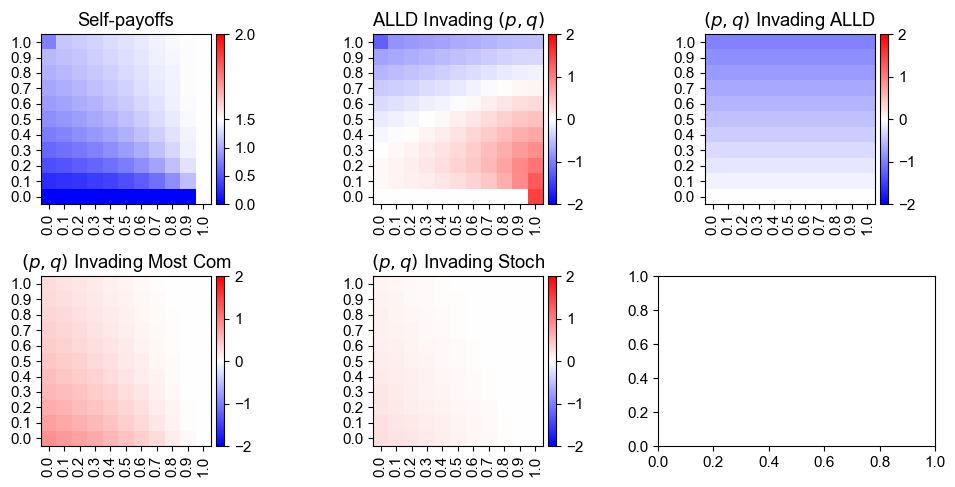

In [41]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 5))

for i, payoffs_matrix in enumerate(payoff_matrices):
    index = int(i / 3), i % 3
    
    if i == 0:
        
        vmin = 0 
        vmax = b
        norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=b - c/2, vmax=vmax)
        
    else:
        
        vmin = -b
        vmax = b
        norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
        

    im = axes[index].imshow(payoffs_matrix.T, origin="lower", norm=norm);

    axes[index].set_xticks(range(n), ps.round(3), rotation=90)

    axes[index].set_yticks(range(n), qs.round(3), rotation=0)
    axes[index].set_title(titles[i])

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cb = fig.colorbar(im, cax=cax, orientation='vertical')

fig.tight_layout();

### More Memory

In [42]:
max_ = 670092.0

In [43]:
cmaps = [matplotlib.colormaps.get_cmap("Blues"),
         matplotlib.colormaps.get_cmap("Reds"),
         matplotlib.colormaps.get_cmap("Greens"), 
         matplotlib.colormaps.get_cmap("Purples"),
#          matplotlib.colormaps.get_cmap("Oranges"),
         matplotlib.colormaps.get_cmap("RdPu")]

In [44]:
two_op_files = [f"../to_archieve/clean_snowdrift_{type_}_benefit_two_opponents.csv" 
                for type_ in ['low', 'high']]

two_op_dfs = [pd.read_csv(file) for file in two_op_files]

In [45]:
heatmaps = []; extents = []

for df in two_op_dfs:

    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)


    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    heatmaps.append(heatmap)
    extents.append(extent)

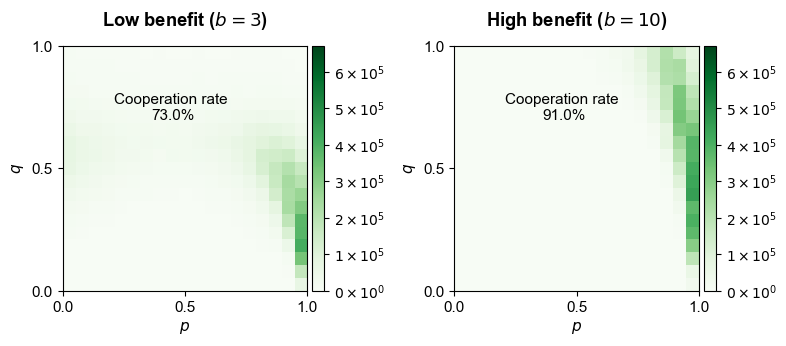

In [46]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 7))

cooperation_rates = [round(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)), 2) 
                     for df in two_op_dfs]

for i, heatmap in enumerate([heatmaps[0], heatmaps[1]]):
    
    index = (i % 2)

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[2],
                            vmax=max_)

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cb = fig.colorbar(im, cax=cax, orientation='vertical',
                 format=ticker.FuncFormatter(fmt))
    
    for t in cb.ax.get_yticklabels():
        t.set_fontsize(10)

    axes[index].set_xticks(np.linspace(0, 1, 3))
    axes[index].set_yticks(np.linspace(0, 1, 3));
    axes[index].set_xlabel("$p$")
    axes[index].set_ylabel("$q$")

    axes[index].text(0.45, 0.7, "Cooperation rate \n" + str(cooperation_rates[i] * 100) + '%',
                     horizontalalignment='center')



axes[0].set_title(r"Low benefit ($b=3$)", weight="bold", y=1.05);

axes[1].set_title(r"High benefit ($b=10$)", weight="bold", y=1.05);


fig.tight_layout();

# fig.savefig("../static/two_interactions_donation_game.pdf", bbox_inches='tight')

In [47]:
two_rounds_files = [f"../to_archieve/clean_snowdrift_{type_}_benefit_two_rounds.csv" 
                for type_ in ['low', 'high']]

two_rounds_dfs = [pd.read_csv(file) for file in two_rounds_files]

In [48]:
heatmaps = []; extents = []

for df in two_op_dfs:

    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)


    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    heatmaps.append(heatmap)
    extents.append(extent)

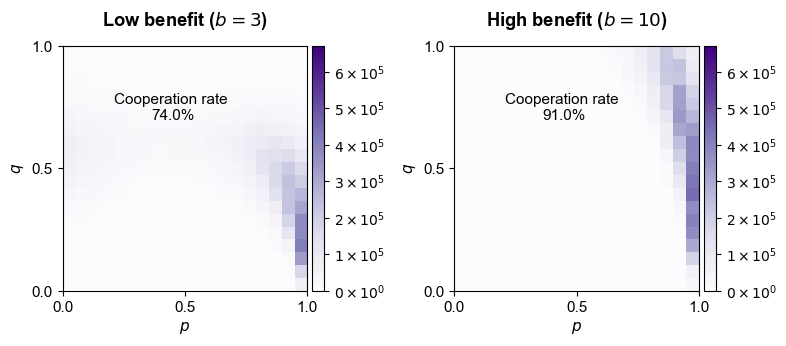

In [49]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 7))

cooperation_rates = [round(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)), 2) 
                     for df in two_rounds_dfs]

for i, heatmap in enumerate([heatmaps[0], heatmaps[1]]):
    
    index = (i % 2)

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[3],
                            vmax=max_)

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cb = fig.colorbar(im, cax=cax, orientation='vertical',
                 format=ticker.FuncFormatter(fmt))
    
    for t in cb.ax.get_yticklabels():
        t.set_fontsize(10)

    axes[index].set_xticks(np.linspace(0, 1, 3))
    axes[index].set_yticks(np.linspace(0, 1, 3));
    axes[index].set_xlabel("$p$")
    axes[index].set_ylabel("$q$")

    axes[index].text(0.45, 0.7, "Cooperation rate \n" + str(cooperation_rates[i] * 100) + '%',
                     horizontalalignment='center')



axes[0].set_title(r"Low benefit ($b=3$)", weight="bold", y=1.05);

axes[1].set_title(r"High benefit ($b=10$)", weight="bold", y=1.05);


fig.tight_layout();

# fig.savefig("../static/two_interactions_donation_game.pdf", bbox_inches='tight')

In [50]:
titles = ["Perfect Payoff \n Memory",
          "Limited Payoff \n Memory",
          "Final Round of Two \n Repeated Games",
          "Last Two Rounds of One \n Repeated Game",
          "Average Payoff of One \n Repeated Game"]

In [51]:
low_benefit_files = ['../to_archieve/clean_snowdrift_low_benefit.csv',
                     '../to_archieve/clean_snowdrift_low_benefit_limited.csv',
                     '../to_archieve/clean_snowdrift_low_benefit_two_opponents.csv',
                     '../to_archieve/clean_snowdrift_low_benefit_two_rounds.csv',
                     '../to_archieve/clean_snowdrift_low_benefit_one.csv']

In [52]:
high_benefit_files = ['../to_archieve/clean_snowdrift_high_benefit.csv',
                      '../to_archieve/clean_snowdrift_high_benefit_limited.csv',
                      '../to_archieve/clean_snowdrift_high_benefit_two_opponents.csv',
                      '../to_archieve/clean_snowdrift_high_benefit_two_rounds.csv',
                      '../to_archieve/clean_snowdrift_high_benefit_one.csv']

In [53]:
low_dfs = [pd.read_csv(file) for file in low_benefit_files]

In [54]:
high_dfs = [pd.read_csv(file) for file in high_benefit_files]

In [55]:
bar_colors = [cmap(0.9) for cmap in cmaps]

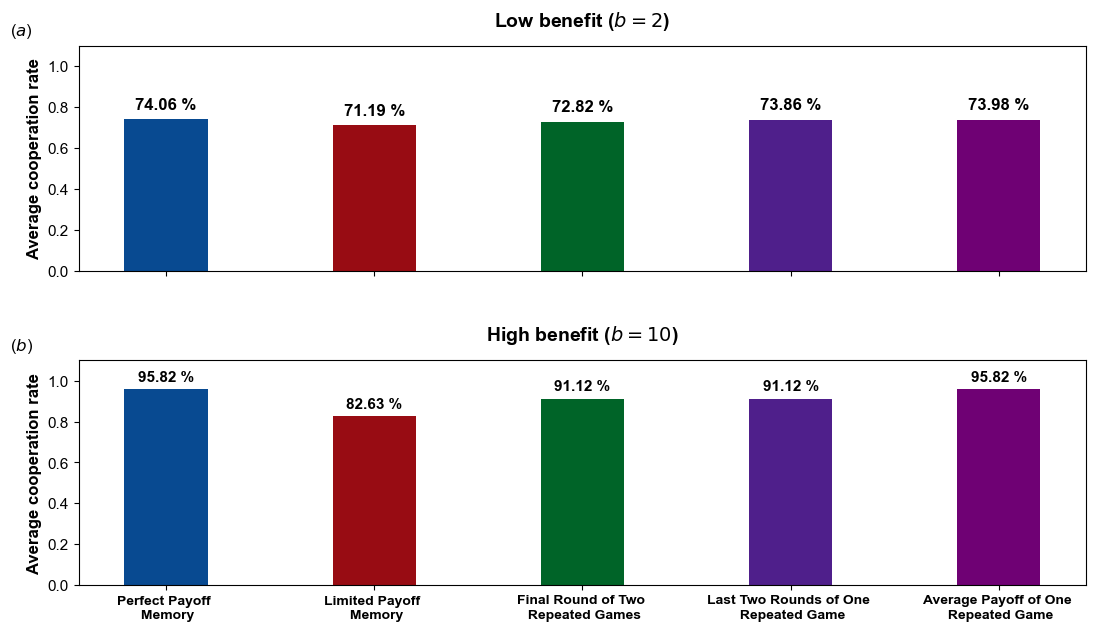

In [56]:
fig, axes = plt.subplots(nrows=2, figsize=(13, 7));

height_low = [sum(df['average cooperation rate'] * (df['frequencies'] / sum(df['frequencies'])))
          for df in low_dfs]

height_high = [sum(df['average cooperation rate'] * (df['frequencies'] / sum(df['frequencies']))) 
          for df in high_dfs]

x_pos = np.arange(len(titles))

axes[0].bar(x_pos, height_low, width=0.4, color=bar_colors);

axes[1].bar(x_pos, height_high, width=0.4, color=bar_colors);

for ax in axes:
    ax.set_ylabel("Average cooperation rate", weight="bold", fontsize=12);
    ax.set_ylim(0, 1.1);
    ax.set_xticks([0, 1, 2, 3, 4]);
    
axes[0].set_xticklabels(["" for _ in range(5)], fontsize=10);
axes[1].set_xticklabels(titles,
                        fontsize=10,
                        weight="bold");

axes[0].set_title("Low benefit ($b = 2$)", fontweight='bold', fontsize=14, y=1.05);

axes[1].set_title("High benefit ($b = 10$)", fontweight='bold', fontsize=14, y=1.05);


for j, pos in enumerate([0, 1, 2, 3, 4]):
    axes[0].text(pos,
          height_low[j] + 0.05,
          f"{round(height_low[j] * 100, 2)} %",
          horizontalalignment='center',
          color="black",
          weight='bold',
          fontsize=12
      )
for j, pos in enumerate([0, 1, 2, 3, 4]):
    axes[1].text(pos,
          height_high[j] + 0.04,
          f"{round(height_high[j] * 100, 2)} %",
          horizontalalignment='center',
          color="black",
          weight='bold',
          fontsize=11
      )
    
axes[0].text(-.75, 1.15, "($a$)", fontsize=12,)
axes[1].text(-.75, 1.15, "($b$)", fontsize=12,)

plt.subplots_adjust(hspace=.4)
    
plt.savefig("../paper/static/snowdrift_game_more_memory.pdf", bbox_inches='tight')